# An Exploration of Classification Models 
## Utilizing the UCI ML Iris dataset 
### Task: Find the best model to predict the Class of Iris given Sepal and Petal dimensions

# STEP 1: EDA

In [223]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [224]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [225]:
# Connect to IRIS data - add column labels
df  = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 names = ["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Class"])

In [226]:
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [227]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


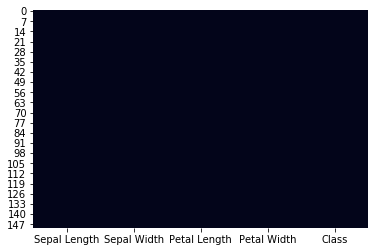

In [228]:
# Look for nulls - found none
sns.heatmap(df.isnull(), cbar=False)

In [229]:
# just double checking - still no missing data
df.isna().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

In [231]:
df.shape

(150, 5)

In [232]:
df.mean()

Sepal Length    5.843333
Sepal Width     3.054000
Petal Length    3.758667
Petal Width     1.198667
dtype: float64

In [233]:
# Looks like there's a high correlation between all measurements
# except with Sepal Width
df.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000000,-0.109369,0.871754,0.817954
Sepal Width,-0.109369,1.000000,-0.420516,-0.356544
Petal Length,0.871754,-0.420516,1.000000,0.962757
Petal Width,0.817954,-0.356544,0.962757,1.000000


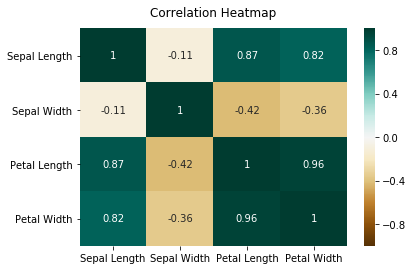

In [234]:
# In this heatmap, it visually stands out that Sepal Length, 
# Petal Length, and Petal Width are highly correlated
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

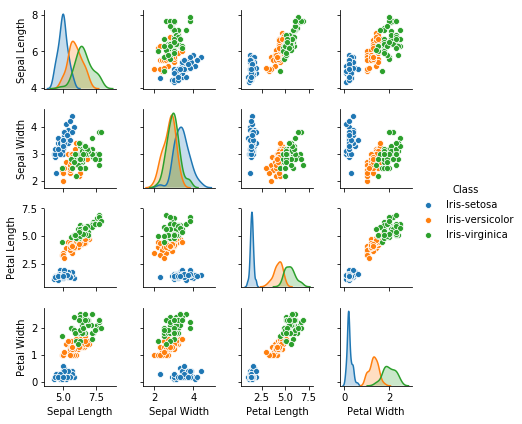

In [242]:
# Looking at the density plots of the data
# we can see that - only Sepal Width and Sepal Length look normal
# Petal width and petal length have double peaks - potentially bimodal
sns.pairplot(df, hue='Class', height=1.5);

In [188]:
# Import packages for Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [189]:
# Set variables 
X = df[["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"]]
y = df["Class"]

In [190]:
# Question - how to select the appropriate test_size?
# What to base this off of? How to improve it?
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=3)

In [191]:
# Instantiate model, fit model with training data, and generate predictions using test data
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

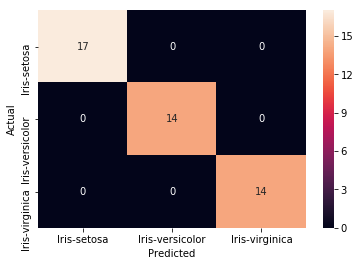

In [192]:
# Analyze performance of model - look at accuracy scores
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [193]:
# Print the overall accuracy score below - 97.77% seems really high
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  1.0


# Let's look at how a Decision Tree does with this data

In [213]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
dtree = DecisionTreeClassifier(max_depth=3)

In [214]:
# Now implement cross validation: keep 10% as test data 
cv_scores = cross_val_score(dtree, X_train, y_train, cv=10)
cv_scores

array([0.91666667, 0.91666667, 1.        , 0.90909091, 1.        ,
       1.        , 0.88888889, 1.        , 0.66666667, 0.88888889])

In [216]:
# Average accuracy score of the 10 models
cv_scores.mean()

0.9186868686868687

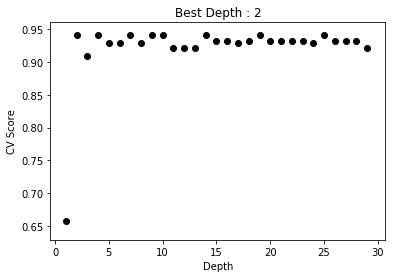

In [217]:
# Plot the Accuracy Scores for the "optimal" max_depth
# Notice - 
fig, ax = plt.subplots(1)

best_score = 0

for d in range(1,30):
    T = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = cross_val_score(T, X_train, y_train, cv=10).mean()
    ax.scatter(d, cv_score, color = "black")
    if cv_score > best_score:
        best_depth = d
        best_score = cv_score

l = ax.set(title = "Best Depth : " + str(best_depth),
       xlabel = "Depth", 
       ylabel = "CV Score")

In [218]:
best_depth

2

In [219]:
# Using this best_depth, instantiate a new Decision Tree instance.
# After fitting and scoring the model, we see that the score is just
# higher than the average score.
T = tree.DecisionTreeClassifier(max_depth=best_depth)
T.fit(X_train, y_train)
T.score(X_test, y_test)

0.9333333333333333

In [220]:
from sklearn.metrics import classification_report, confusion_matrix

In [221]:
# It's too simple of a data set that it's either too easy for the tree
# or there's overfitting
print(classification_report(y_test, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.93      0.93      0.93        14

      micro avg       0.96      0.96      0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [198]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]


In [210]:
# The model looks like it achieves a perfect score on the 
# training data, but not quite as well on the test data
# so this might be an example of Overfitting
dtree.score(X_train, y_train), dtree.score(X_test, y_test)

(1.0, 0.9555555555555556)

[Text(0, 0.5, 'Performance (score)'), Text(0.5, 0, 'Complexity (depth)')]

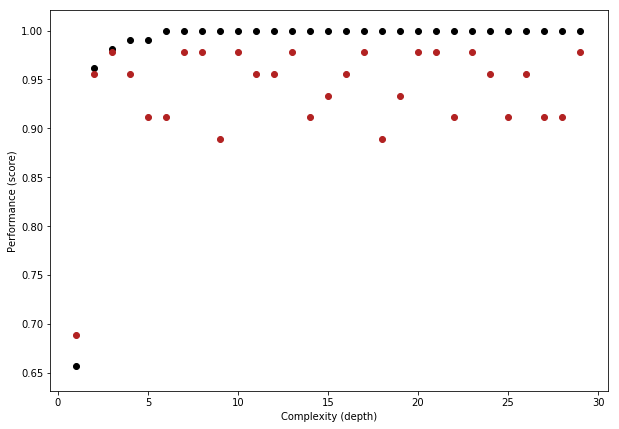

In [211]:
fig, ax = plt.subplots(1, figsize = (10, 7))

for d in range(1, 30):
    T = tree.DecisionTreeClassifier(max_depth = d)

    T.fit(X_train, y_train)
    
    ax.scatter(d, T.score(X_train, y_train), color = "black")
    ax.scatter(d, T.score(X_test, y_test), color = "firebrick")

ax.set(xlabel = "Complexity (depth)", ylabel = "Performance (score)")

In [199]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Sepal Width', 'Petal Length', 'Petal Width', 'Class']

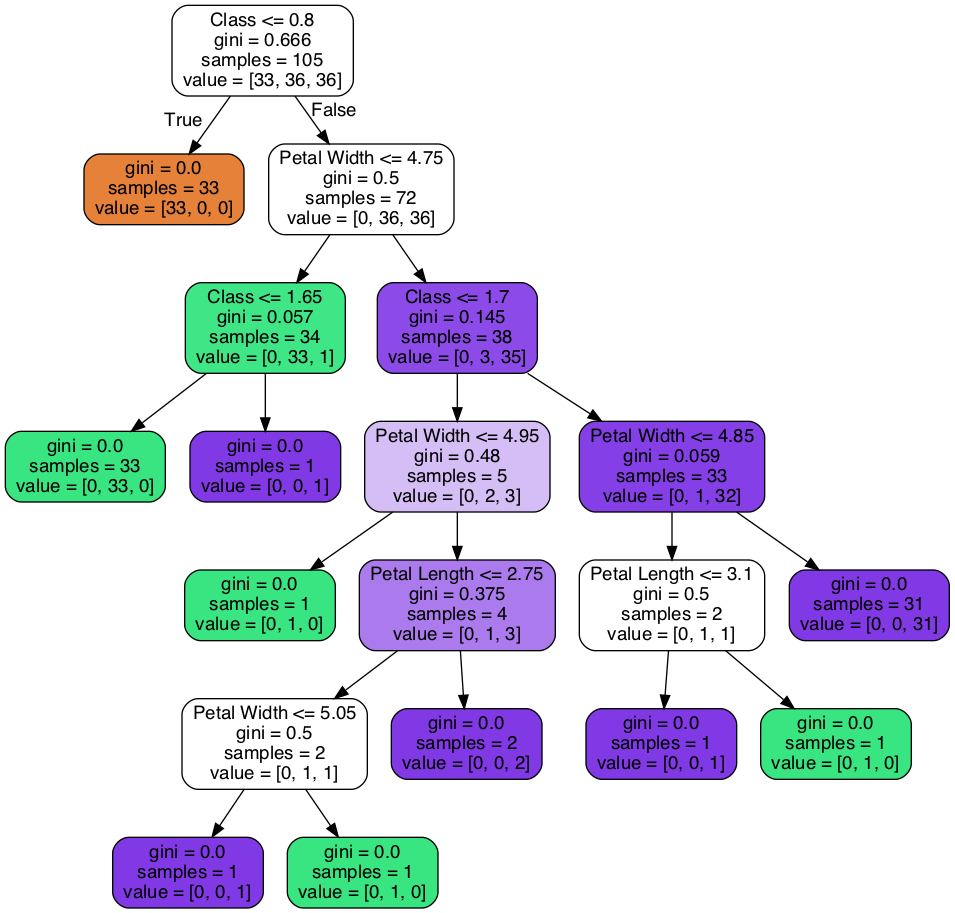

In [200]:
# Add note about what the image tells me

dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

In [201]:
# Now lets add Random Forests and compare the Decision Tree model to it
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [202]:
rfc_pred = rfc.predict(X_test)

In [203]:
print(confusion_matrix(y_test,rfc_pred))

[[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]


In [204]:
print(classification_report(y_test,rfc_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.93      0.93      0.93        14
 Iris-virginica       0.93      0.93      0.93        14

      micro avg       0.96      0.96      0.96        45
      macro avg       0.95      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



In [ ]:
# Lol it's really accurate - probably because of Linear Dependencies